In [1]:
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot
import plotly.express as px

import sympy
from sympy import Symbol, Function
from sympy.tensor.array import Array

from matplotlib import pyplot as plt

In [46]:
# Тестовый пример 1

xs = [Symbol('x' + str(i)) for i in range(2)]
f = 2 * xs[0] ** 2 + xs[0] * xs[1] + xs[1] ** 2 - 3 * xs[0]

x0 = np.array([20., 20.])
lr = 1e-1
eps = 1e-7

f_text = "f(x_1, x_2) = 2 x_1^2 + x_1 x_ 2 + x_2^2 - 3x_1"

description = ", (x_1^{(0)}, x_2^{(0)}) = " + "({:.1f}, {:.1f}), ".format(*x0) +\
              "lr = " + "{:.1e}".format(lr)
title_text = "$ " + f_text + description + " $"

x = np.linspace(-20, 20, 50)
y = np.linspace(-20, 20, 50)

f

2*x0**2 + x0*x1 - 3*x0 + x1**2

In [38]:
# Тестовый пример 2

xs = [Symbol('x' + str(i)) for i in range(2)]
f  = 3 * xs[0] ** 2 + 4 * xs[1] ** 2 + 23 * sympy.cos(xs[0] - 0.5)

x0 = np.array([20., 20.])
lr = 1e-2
eps = 1e-7

f_text = "f(x_1, x_2) = 3x_1^2 - 23sin(x_1-0.5)"

description = ", (x_1^{(0)}, x_2^{(0)}) = " + "({:.1f}, {:.1f}), ".format(*x0) +\
              "lr = " + "{:.1e}".format(lr)
title_text = "$ " + f_text + description + " $"

x = np.linspace(-20, 20, 50)
y = np.linspace(-20, 20, 50)

f

3*x0**2 + 4*x1**2 + 23*cos(x0 - 0.5)

In [41]:
# Тестовый пример 3 (функция Розенброка)

xs = [Symbol('x' + str(i)) for i in range(2)]
f  = (xs[1] - xs[0] ** 2) ** 2 + (1 - xs[0]) ** 2

x0 = np.array([10., 10.])
lr = 1e-1
eps = 1e-3

f_text = "f(x_1, x_2) = (x_2 - x_1^2)^2 + (1 - x_1)^2"

description = ", (x_1^{(0)}, x_2^{(0)}) = " + "({:.1f}, {:.1f}), ".format(*x0) +\
              "lr = " + "{:.1e}".format(lr)
title_text = "$ " + f_text + description + " $"

x = np.linspace(-20, 20, 50)
y = np.linspace(-20, 20, 50)

f

(1 - x0)**2 + (-x0**2 + x1)**2

In [3]:
def expr_eval(expr, x):
    return np.double(expr.subs([(xs[i], x[i]) for i in range(len(xs))]))

def grad_descent(f, x0, lr=1e-2, eps=1e-7, lr_min=1e-8, callback=lambda n, xn, lr, norm: None):
    
    df = Array([sympy.diff(f, _) for _ in xs]) # символьный градиент
    
    print("grad f = {:s}".format(str(df)))
    
    xn = np.copy(x0)
    x = [np.copy(xn)]
    norm = np.linalg.norm(expr_eval(df, xn))
    
    while norm >= eps:
        if lr < lr_min:
            callback(len(x), xn, lr, norm)
            x.append(np.copy(xn))
            return np.array(x)
        
        xn_next = xn - lr * expr_eval(df, xn)
        
        if expr_eval(f, xn_next) >= expr_eval(f, xn):
            lr /= 2
            continue
        
        xn = np.copy(xn_next)
        norm = np.linalg.norm(expr_eval(df, xn))
        
        callback(len(x), xn, lr, norm)
        x.append(np.copy(xn))
    return np.array(x)

In [47]:
show_progress = False

callback = lambda n, xn, lr, norm: print("n = {:d}, f = {:.2e}, lr = {:.2e}, norm = {:.2e}".format(n, expr_eval(f, xn), lr, norm)) if show_progress else lambda n, xn, lr, norm: None

grad_res = grad_descent(f, x0, lr, eps=eps, callback = callback)
print("steps_count = {:d}, arg_min = {:s}, min = {:.2f}".format(grad_res.shape[0], str(grad_res[-1, :]), expr_eval(f, grad_res[-1, :])))

grad f = [4*x0 + x1 - 3, x0 + 2*x1]
steps_count = 112, arg_min = [ 0.85714284 -0.42857138], min = -1.29


In [79]:
# Визуализация для функции двух аргументов через 3D модель

marker_size = 4
line_width = 3
opacity = 0.6

z = np.zeros((len(y), len(x)), dtype=np.double)

for iy in range(len(y)):
    for ix in range(len(x)):
        z[iy, ix] = expr_eval(f, (x[ix], y[iy]))


fig = go.Figure([go.Surface(x = x,
                            y = y,
                            z = z,
                            opacity=opacity),
                 go.Scatter3d(x = grad_res[:, 0],
                              y = grad_res[:, 1],
                              z = [expr_eval(f, grad_res[m, :]) for m in range(grad_res.shape[0])],
                              mode="lines",
                              line={'width': line_width, 'color': 'white'},
                              name='Траектория спуска'),
                 go.Scatter3d(x = grad_res[:, 0],
                              y = grad_res[:, 1],
                              z = [expr_eval(f, grad_res[m, :]) for m in range(grad_res.shape[0])],
                              mode="markers",
                              marker={'size': marker_size, 'color': 'red'},
                              name="Шаг спуска")

                ])

fig.update_layout(title ={ 'text': title_text,  'font': { 'size': 15 } },
                  legend={ 'orientation': "h",
                           'yanchor': "bottom",
                           'y': 1.02,
                           'xanchor': "right",
                           'x': 1,
                           'bgcolor': "LightSteelBlue",
                           'bordercolor': "Black",
                           'borderwidth': 2 }
                 )
fig.show()

# Сохранение на диск
fig.update_layout(width=1920, height=1080)
plot(fig, auto_open=False, filename="grad_descent.html", include_mathjax="cdn")

'grad_descent.html'

Text(0.5, 1.0, '$ f(x_1, x_2) = 2 x_1^2 + x_1 x_ 2 + x_2^2 - 3x_1, (x_1^{(0)}, x_2^{(0)}) = (20.0, 20.0), lr = 1.0e-01 $')

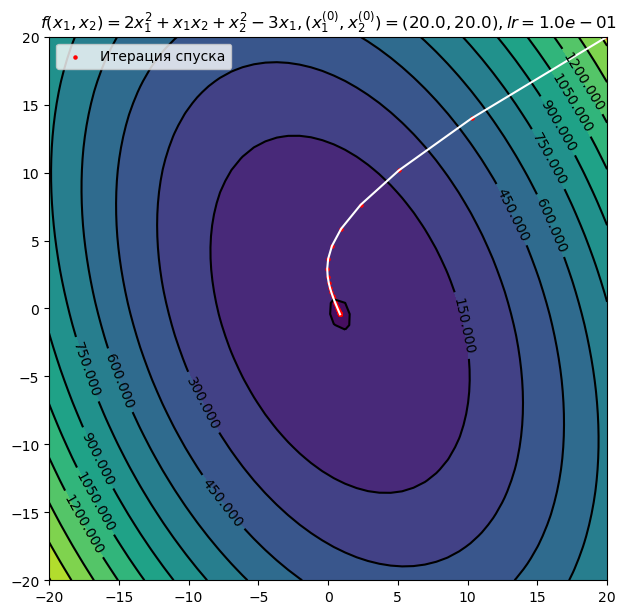

In [52]:
# Визуализация для функции двух аргументов через линии уровня

from matplotlib import pyplot as plt

n_levels = 15 # число линий уровня
markersize = 5

z = np.zeros((len(y), len(x)), dtype=np.double)

for iy in range(len(y)):
    for ix in range(len(x)):
        z[iy, ix] = expr_eval(f, (x[ix], y[iy]))

fig, ax = plt.subplots(figsize=(7.20, 7.20), dpi=100)


ax.contourf(*np.meshgrid(x, y), z,
            levels=n_levels)

CS = ax.contour(*np.meshgrid(x, y), z,
                levels = n_levels,
                colors=[(0, 0, 0)] * n_levels)
ax.clabel(CS)

ax.scatter(grad_res[:, 0], grad_res[:, 1], c='r', s=markersize, label="Итерация спуска")
ax.plot(grad_res[:, 0], grad_res[:, 1], c=(1, 1, 1))

plt.legend()
plt.title(title_text)
